In [1]:
import mysql.connector
import json
import pandas as pd

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kaja25802580",
  database="twitter_database"
)

mycursor = mydb.cursor()


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#for network creation
import networkx as nx

In [3]:
df_tweets = pd.read_sql("select id, author_id, like_count from tweets", mydb)
df_users = pd.read_sql("select id, username from users", mydb)
df_users_liked = pd.read_sql("select * from users_liked", mydb)

In [4]:
merged_df= pd.merge(left=df_tweets, right=df_users_liked, left_on='id', right_on='tweet_id')

In [5]:
author_username = pd.merge(left=merged_df, right=df_users, left_on='author_id', right_on='id')

In [6]:
user_liked_username = pd.merge(left=merged_df, right=df_users, left_on='user_id', right_on='id')

In [7]:

graph = nx.Graph()

In [8]:

author = author_username['username']
users_liked = user_liked_username['username']
for i in merged_df.index:
    if merged_df['like_count'][i] > 100:
        graph.add_edge(author[i], users_liked[i])


In [9]:
# plt.figure(figsize =(15, 15))
# nx.draw_networkx(graph, with_labels = True)

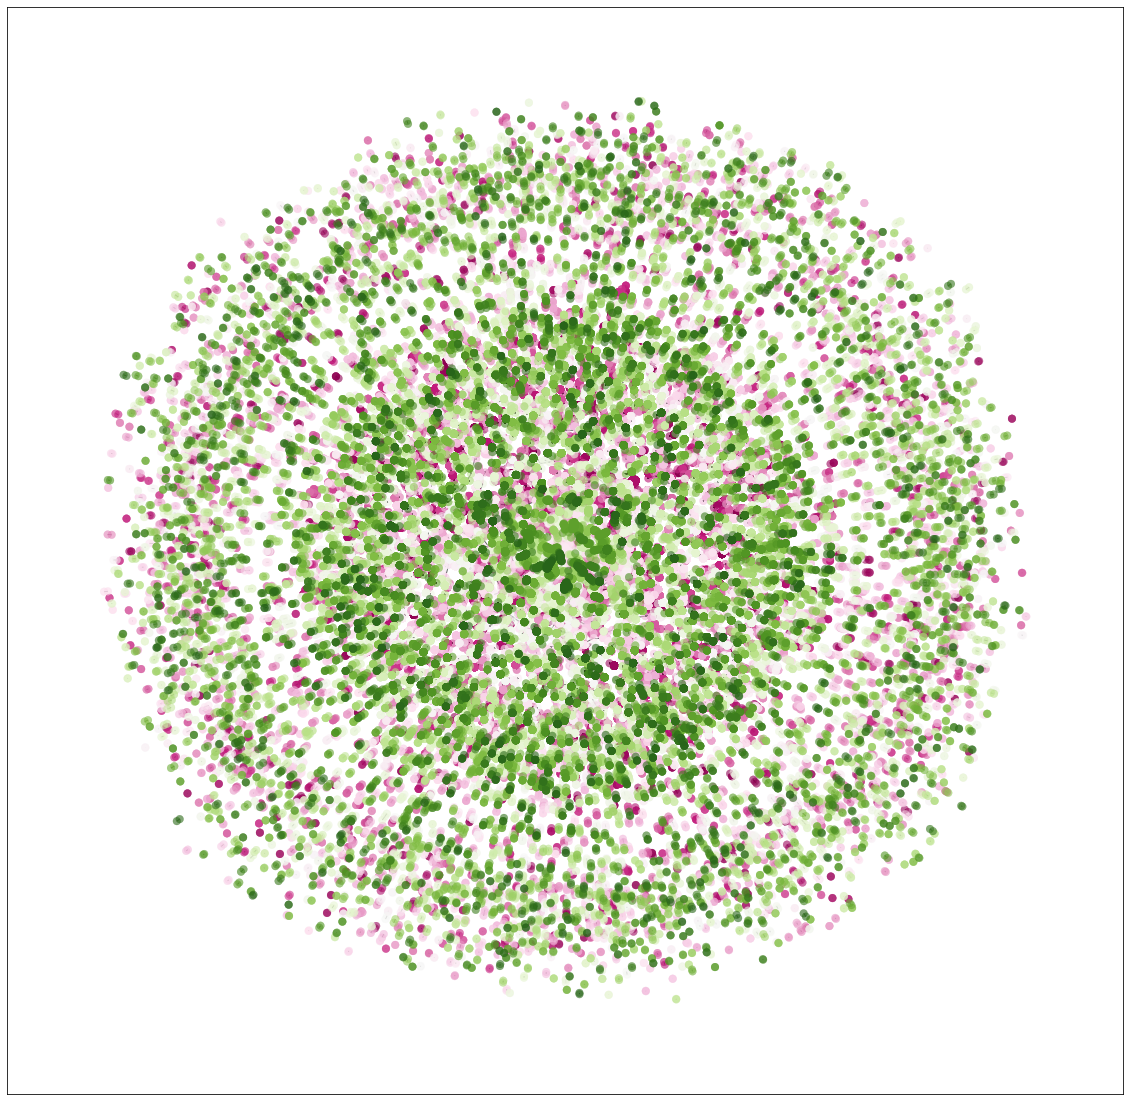

In [10]:
plt.figure(figsize = (20,20))
nx.draw_networkx(graph, node_color=range(graph.number_of_nodes()), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)

In [12]:
print(nx.info(graph))

Graph with 106683 nodes and 96253 edges


## Degree Centrality

In [84]:
deg_centrality = nx.degree_centrality(graph)
deg_centrality = dict(sorted(deg_centrality.items(), key=lambda item: item[1], reverse=True))
list(deg_centrality.items())[:20]

[('Independent', 0.011056191467221645),
 ('Huk06', 0.011056191467221645),
 ('InovioPharma', 0.010926118626430802),
 ('MadMoneyOnCNBC', 0.010926118626430802),
 ('HiTopFilms', 0.01079604578563996),
 ('alfonslopeztena', 0.010405827263267432),
 ('WinstonLing', 0.010405827263267432),
 ('trevorchiks', 0.010405827263267432),
 ('prfoundation1', 0.010015608740894901),
 ('carlquintanilla', 0.009755463059313216),
 ('BusinessInsider', 0.009235171696149845),
 ('randygdub', 0.00897502601456816),
 ('timesofindia', 0.008844953173777316),
 ('physorg_com', 0.008714880332986473),
 ('THR', 0.00806451612903226),
 ('NamrataaS', 0.007934443288241416),
 ('joshcarlosjosh', 0.007934443288241416),
 ('HindustanTimes', 0.00767429760665973),
 ('ABSCBNNews', 0.007544224765868887),
 ('realLizUSA', 0.0074141519250780444)]

## Closeness Centrality 

In [88]:
close_centrality = nx.closeness_centrality(graph)
close_centrality = dict(sorted(close_centrality.items(), key=lambda item: item[1], reverse=True))
list(close_centrality.items())[:20]

[('Independent', 0.011056191467221643),
 ('Huk06', 0.011056191467221643),
 ('InovioPharma', 0.010926118626430802),
 ('MadMoneyOnCNBC', 0.010926118626430802),
 ('HiTopFilms', 0.010796045785639958),
 ('alfonslopeztena', 0.01040582726326743),
 ('WinstonLing', 0.01040582726326743),
 ('trevorchiks', 0.01040582726326743),
 ('prfoundation1', 0.010015608740894901),
 ('carlquintanilla', 0.009755463059313215),
 ('BusinessInsider', 0.009235171696149845),
 ('randygdub', 0.008975026014568158),
 ('timesofindia', 0.008844953173777315),
 ('physorg_com', 0.008714880332986473),
 ('NamrataaS', 0.0082208958364999),
 ('THR', 0.008064516129032258),
 ('joshcarlosjosh', 0.007934443288241414),
 ('HindustanTimes', 0.0076742976066597295),
 ('ABSCBNNews', 0.007544224765868887),
 ('realLizUSA', 0.007414151925078044)]

## Betweenness Centrality

In [89]:
bet_centrality = nx.betweenness_centrality(graph, normalized = True, endpoints = False)
bet_centrality = dict(sorted(bet_centrality.items(), key=lambda item: item[1], reverse=True))
list(bet_centrality.items())[:20]

[('Independent', 0.00012081697453448916),
 ('Huk06', 0.00012081697453448916),
 ('InovioPharma', 0.00011797422219250118),
 ('MadMoneyOnCNBC', 0.00011797422219250118),
 ('HiTopFilms', 0.00011516531214029877),
 ('alfonslopeztena', 0.00010694163572240497),
 ('WinstonLing', 0.00010694163572240497),
 ('trevorchiks', 0.00010694163572240497),
 ('prfoundation1', 9.90225399125813e-05),
 ('carlquintanilla', 9.391235415496006e-05),
 ('NamrataaS', 9.035891372747509e-05),
 ('lastmilehealth', 8.788842657312839e-05),
 ('BusinessInsider', 8.409809011714441e-05),
 ('randygdub', 7.939401183695002e-05),
 ('timesofindia', 7.709273613153118e-05),
 ('physorg_com', 7.482530271589791e-05),
 ('guardiannews', 6.558635760443697e-05),
 ('THR', 6.399576998451513e-05),
 ('MarianHolling', 6.318355502966141e-05),
 ('joshcarlosjosh', 6.193139030759529e-05)]